In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [87]:
train = pd.read_csv("train.csv")

In [89]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [90]:
survived = train[train['Survived']==1]
notsurv = train[train['Survived']==0]

In [91]:
m_s=len(survived[survived['Sex']=='male'])
f_s=len(survived[survived['Sex']=='female'])
m_ns=len(notsurv[notsurv['Sex']=='male'])
f_ns=len(notsurv[notsurv['Sex']=='female'])


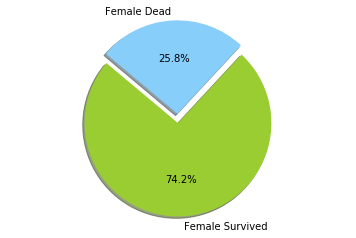

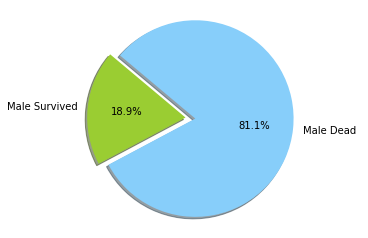

In [92]:
labels = ['Female Survived', 'Female Dead']
sizes = [f_s,f_ns]
colors = ['yellowgreen', 'lightskyblue']

explode = (0, 0.1)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

labels = ['Male Survived', 'Male Dead']
sizes = [m_s,m_ns]
colors = ['yellowgreen', 'lightskyblue']

explode = (0, 0.1)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()



In [93]:
one_s=len(survived[survived['Pclass']==1])
two_s=len(survived[survived['Pclass']==2])
three_s=len(survived[survived['Pclass']==3])
one_ns=len(notsurv[notsurv['Pclass']==1])
two_ns=len(notsurv[notsurv['Pclass']==2])
three_ns=len(notsurv[notsurv['Pclass']==3])

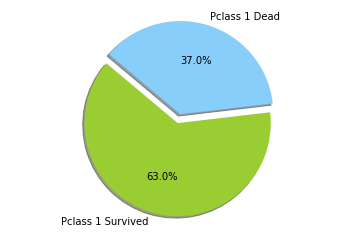

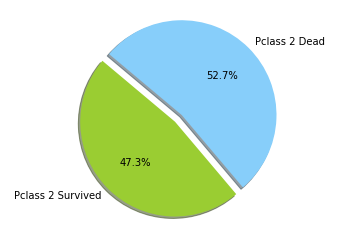

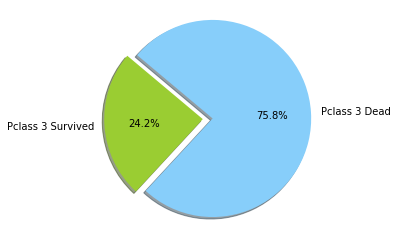

In [94]:
labels = ['Pclass 1 Survived', 'Pclass 1 Dead']
sizes = [one_s,one_ns]
colors = ['yellowgreen', 'lightskyblue']

explode = (0, 0.1)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

labels = ['Pclass 2 Survived', 'Pclass 2 Dead']
sizes = [two_s,two_ns]
colors = ['yellowgreen', 'lightskyblue']

explode = (0, 0.1)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()


labels = ['Pclass 3 Survived', 'Pclass 3 Dead']
sizes = [three_s,three_ns]
colors = ['yellowgreen', 'lightskyblue']

explode = (0, 0.1)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()



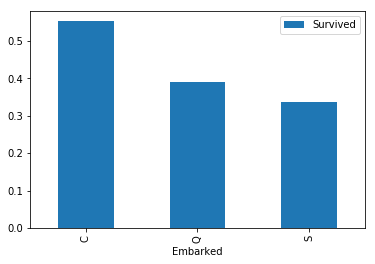

In [95]:
class_pivot = train.pivot_table(index="Embarked",values="Survived")
class_pivot.plot.bar()
plt.show()

In [97]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


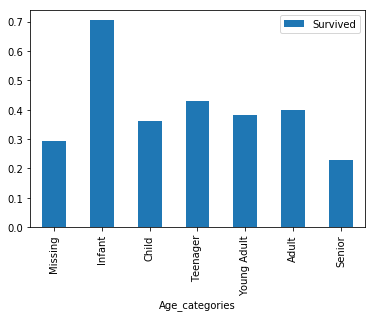

In [98]:
cut_points = [-1,0,5,12,18,35,60,100]
label_names = ["Missing","Infant","Child","Teenager","Young Adult","Adult","Senior"]

train["Age"] = train["Age"].fillna(-0.5)
train["Embarked"] = train["Embarked"].fillna('N')
train["Age_categories"] = pd.cut(train["Age"],cut_points,labels=label_names)

pivot = train.pivot_table(index="Age_categories",values='Survived')
pivot.plot.bar()
plt.show()

In [102]:
train_X = train[['Pclass','Sex','Age_categories','Embarked']]
train_Y = train[['Survived']]
train_arX = np.array(train_X)
train_arY = np.array(train_Y)
train_X.head()
print(train_ar)

[[2 1 6 3]
 [0 0 0 0]
 [2 0 6 3]
 ...
 [2 0 3 3]
 [0 1 6 0]
 [2 1 6 2]]


In [104]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
train_arX[:,0] = labelencoder_X.fit_transform(train_ar[:,0])
train_arX[:,1] = labelencoder_X.fit_transform(train_ar[:,1])
train_arX[:,2] = labelencoder_X.fit_transform(train_ar[:,2])
train_arX[:,3] = labelencoder_X.fit_transform(train_ar[:,3])

In [105]:
print(train_arX)

[[2 1 6 3]
 [0 0 0 0]
 [2 0 6 3]
 ...
 [2 0 3 3]
 [0 1 6 0]
 [2 1 6 2]]


In [111]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_arX, train_arY, test_size=0.2, random_state=0)

In [121]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
clf = LogisticRegression(random_state=0, solver='lbfgs')
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(accuracy)

0.7988826815642458


C:\Users\Vamsi\Anaconda3\envs\tiger\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [115]:
from sklearn.model_selection import GridSearchCV
parameters = {'C':np.linspace(0.00001,100000,30)}
lf = GridSearchCV(clf, parameters, cv=5)
lf.fit(X_train, y_train)
s = lf.best_score_
print(s)

C:\Users\Vamsi\Anaconda3\envs\tiger\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Vamsi\Anaconda3\envs\tiger\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Vamsi\Anaconda3\envs\tiger\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Vamsi\Anaconda3\envs\tiger\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Ple

C:\Users\Vamsi\Anaconda3\envs\tiger\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Vamsi\Anaconda3\envs\tiger\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Vamsi\Anaconda3\envs\tiger\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Vamsi\Anaconda3\envs\tiger\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Ple

C:\Users\Vamsi\Anaconda3\envs\tiger\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Vamsi\Anaconda3\envs\tiger\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Vamsi\Anaconda3\envs\tiger\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Vamsi\Anaconda3\envs\tiger\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Ple

C:\Users\Vamsi\Anaconda3\envs\tiger\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Vamsi\Anaconda3\envs\tiger\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Vamsi\Anaconda3\envs\tiger\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Vamsi\Anaconda3\envs\tiger\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Ple

C:\Users\Vamsi\Anaconda3\envs\tiger\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Vamsi\Anaconda3\envs\tiger\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Vamsi\Anaconda3\envs\tiger\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Vamsi\Anaconda3\envs\tiger\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Ple

0.7808988764044944


C:\Users\Vamsi\Anaconda3\envs\tiger\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Vamsi\Anaconda3\envs\tiger\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Vamsi\Anaconda3\envs\tiger\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [118]:
test = pd.read_csv("test.csv")

In [139]:
cut_points = [-1,0,5,12,18,35,60,100]
label_names = ["Missing","Infant","Child","Teenager","Young Adult","Adult","Senior"]

test["Age"] = test["Age"].fillna(-0.5)
test["Embarked"] = test["Embarked"].fillna('N')
test["Age_categories"] = pd.cut(test["Age"],cut_points,labels=label_names)

In [140]:
test_X = test[['Pclass','Sex','Age_categories','Embarked']]
test_ar = np.array(test_X)


labelencoder_X = LabelEncoder()
test_arX[:,0] = labelencoder_X.fit_transform(test_ar[:,0])
test_arX[:,1] = labelencoder_X.fit_transform(test_ar[:,1])
test_arX[:,2] = labelencoder_X.fit_transform(test_ar[:,2])
test_arX[:,3] = labelencoder_X.fit_transform(test_ar[:,3])

In [129]:
print(test_arX)

[[2 1 6 1]
 [2 0 0 2]
 [1 1 4 1]
 ...
 [2 1 0 2]
 [2 1 3 2]
 [2 1 3 0]]


In [141]:
pred = clf.predict(test_arX)
test['Survived'] = pred
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_categories,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Young Adult,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Adult,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Senior,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Young Adult,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Young Adult,1


In [142]:
output = test[['PassengerId', 'Survived']]

In [143]:
submission = pd.DataFrame(output)
submission.to_csv("submission2.csv",index=False)

In [138]:
from sklearn import svm

clf = svm.SVC(gamma='scale')
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(accuracy)

0.8212290502793296


C:\Users\Vamsi\Anaconda3\envs\tiger\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
